In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
import pickle

In [2]:
# Setting pandas to display columns
pd.set_option('display.max_columns', None)

In [4]:
# Setting pandas to display rows
pd.set_option('display.max_rows', False)

In [3]:
# Pulling in NFL Play-by-Play Data
nfl_data_df = pd.read_csv('NFL Play by Play 2009-2018 (v5).csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# Looking at size of dataframe
nfl_data_df.shape

(449371, 255)

In [10]:
# Checking out data types
nfl_data_df.dtypes

play_id                            int64
game_id                            int64
home_team                         object
away_team                         object
posteam                           object
posteam_type                      object
defteam                           object
side_of_field                     object
yardline_100                     float64
game_date                         object
quarter_seconds_remaining        float64
half_seconds_remaining           float64
                                  ...   
return_yards                     float64
penalty_team                      object
penalty_player_id                 object
penalty_player_name               object
penalty_yards                    float64
replay_or_challenge                int64
replay_or_challenge_result        object
penalty_type                      object
defensive_two_point_attempt      float64
defensive_two_point_conv         float64
defensive_extra_point_attempt    float64
defensive_extra_

In [11]:
nfl_data_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

In [12]:
# Getting a list of columns in the dataset to allow me to trim down to most important
list(nfl_data_df.columns)

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [4]:
# Getting smaller set of columns to use for analysis
cols = ['play_id','game_id','game_date','time','quarter_seconds_remaining','half_seconds_remaining',
 'game_seconds_remaining','game_half','quarter_end','qtr','home_team','away_team','posteam','posteam_type',
 'defteam','side_of_field','yardline_100','drive','sp','down','goal_to_go','yrdln','ydstogo','ydsnet',
 'desc','play_type','yards_gained','pass_length','air_yards','yards_after_catch','field_goal_result',
 'kick_distance','extra_point_result','two_point_conv_result','td_team','total_home_score','total_away_score',
 'posteam_score','defteam_score','sack','touchdown','pass_touchdown','rush_touchdown','return_touchdown',
 'extra_point_attempt','two_point_attempt','field_goal_attempt','fumble','complete_pass']

In [7]:
nfl_small.posteam.unique()

array(['PIT', 'NE', nan, 'CHI', 'GB', 'KC', 'HOU', 'NYJ', 'CLE', 'IND',
       'BUF', 'WAS', 'MIA', 'JAC', 'CAR', 'SEA', 'STL', 'ARI', 'NO',
       'DET', 'SD', 'TEN', 'TB', 'OAK', 'CIN', 'BAL', 'DEN', 'DAL', 'NYG',
       'PHI', 'ATL', 'SF', 'MIN', 'LA', 'JAX', 'LAC'], dtype=object)

In [5]:
# Creating dataframe with most important columns 2015+
nfl_small = nfl_data_df[nfl_data_df['game_date']>='2015-04-01'][cols].reset_index() #Keeping original index column unless needed later
# nfl_small.head(3)

In [6]:
# Saving nfl_small to csv to skip loading full file
nfl_small.to_csv('nfl_small.csv')

In [253]:
nfl_small = pd.read_csv('nfl_small.csv')
nfl_small.shape

(87277, 51)

In [254]:
# Dropping unused index column and sorting to allow for future calculations
nfl_small = nfl_small.drop(columns=['Unnamed: 0']).sort_values(by=['game_id','play_id'])

In [255]:
nfl_small.head(5)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,362097,118,2017090700,2017-09-07,14:14,854.0,1754.0,3554.0,Half1,0,1,NE,KC,NE,home,KC,NE,65.0,1,0,3.0,0.0,NE 35,2,73,(14:14) (Shotgun) J.White left guard to NE 43 ...,run,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,362098,139,2017090700,2017-09-07,13:52,832.0,1732.0,3532.0,Half1,0,1,NE,KC,NE,home,KC,NE,57.0,1,0,1.0,0.0,NE 43,10,19,"(13:52) (No Huddle, Shotgun) J.White up the mi...",run,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Data Cleaning</h2>

In [256]:
# Changing date object to date format
nfl_small['game_date'] = pd.to_datetime(nfl_small['game_date'])
nfl_small.head(2)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
# Inspecting datatypes
nfl_small.dtypes

index                                 int64
play_id                               int64
game_id                               int64
game_date                    datetime64[ns]
time                                 object
quarter_seconds_remaining           float64
half_seconds_remaining              float64
game_seconds_remaining              float64
game_half                            object
quarter_end                           int64
qtr                                   int64
home_team                            object
                                  ...      
posteam_score                       float64
defteam_score                       float64
sack                                float64
touchdown                           float64
pass_touchdown                      float64
rush_touchdown                      float64
return_touchdown                    float64
extra_point_attempt                 float64
two_point_attempt                   float64
field_goal_attempt              

In [163]:
# Creating a function that examines missing values in a dataframe easily. This can re-used later.
def null_count_func(dataframe):
    columns = list(dataframe.columns)

    for column in columns:
        total = dataframe[column].count()
        null_cnt = dataframe[column].isnull().sum()
        print('Column {} has {} real values, and {} null values'.format(column,total,null_cnt))

In [164]:
null_count_func(nfl_small)

Column index has 87277 real values, and 0 null values
Column play_id has 87277 real values, and 0 null values
Column game_id has 87277 real values, and 0 null values
Column game_date has 87277 real values, and 0 null values
Column time has 87240 real values, and 37 null values
Column quarter_seconds_remaining has 87240 real values, and 37 null values
Column half_seconds_remaining has 87216 real values, and 61 null values
Column game_seconds_remaining has 87218 real values, and 59 null values
Column game_half has 87277 real values, and 0 null values
Column quarter_end has 87277 real values, and 0 null values
Column qtr has 87277 real values, and 0 null values
Column home_team has 87277 real values, and 0 null values
Column away_team has 87277 real values, and 0 null values
Column posteam has 84286 real values, and 2991 null values
Column posteam_type has 84375 real values, and 2902 null values
Column defteam has 84375 real values, and 2902 null values
Column side_of_field has 87132 real

From the null check function, we see quite a few columns with nulls, but I am unsure if that is on purpose or just data gaps.

I plan to explore:   
1. time - Done - fill forward
2. quarter_seconds_remaining - Done - fill forward
3. half_seconds_remaining - Done - fill forward
4. game_seconds_remaining - Done - fill forward
5. posteam - Done - fill forward
6. posteam_type - Done - fill forward
7. defteam - Done - fill forward
8. yardline_100 - Done - dropping nulls
9. down - Done - dropping nulls
10. goal_to_go - Done - dropping nulls
11. play_type - Done - dropping nulls
12. pass_length (ensure it's de-duped from runs) - Done - Fill with zero. Most nulls are kicks or runs. Sacks are also null
13. air_yards (ensure it's de-duped from runs) - Done - Same as pass_length. Ensure we can use this for incomplete passes?
14. yards_after_catch (ensure it's de-duped from runs) - Done - Mostly the same as above, but also includes nulls for incomplete passes
15. posteam_score - Done - beginning of game, so fill with zero
16. defteam_score - Done - beginning of game, so fill with zero

In [165]:
# Null time also affects other time columns so will fill all
nfl_small[nfl_small['time'].isnull()].head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
243,362337,1090,2017091000,2017-09-10,NaN,NaN,NaN,NaN,Half1,0,2,BUF,NYJ,NaN,NaN,NaN,NYJ,NaN,5,0,NaN,NaN,NYJ 34,0,77,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2861,364955,2154,2017091700,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,2,BAL,CLE,NaN,NaN,NaN,CLE,NaN,14,0,NaN,NaN,CLE 2,0,40,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4902,366996,815,2017091710,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,1,DEN,DAL,NaN,NaN,NaN,DEN,NaN,5,0,NaN,NaN,DEN 46,0,15,The game has been suspended. Game halted due t...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4903,366997,831,2017091710,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,1,DEN,DAL,NaN,NaN,NaN,NaN,NaN,5,0,NaN,NaN,NaN,0,15,The game has resumed. Game re-started at 3:58 PM,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6429,368523,2528,2017092401,2017-09-24,NaN,NaN,NaN,NaN,Half1,0,2,BUF,DEN,NaN,NaN,NaN,BUF,NaN,13,0,NaN,NaN,BUF 35,0,0,End of half - 2.34 pm,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
# Most look like stoppage in play. I will try to backfill from previous time
# nfl_small[nfl_small['time'].isnull()].groupby('desc')['desc'].count()

In [167]:
# Exploring blank plays, it looks like we can remove the rows from the dataset
nfl_small[(nfl_small['game_id']==2017091000) & (nfl_small['play_id'].between(1062,1102))]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
242,362336,1062,2017091000,2017-09-10,13:59,839.0,839.0,2639.0,Half1,0,2,BUF,NYJ,BUF,home,NYJ,NYJ,34.0,5,0,2.0,0.0,NYJ 34,10,77,(13:59) (Shotgun) T.Taylor pass short middle t...,pass,12.0,short,4.0,8.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
243,362337,1090,2017091000,2017-09-10,NaN,NaN,NaN,NaN,Half1,0,2,BUF,NYJ,NaN,NaN,NaN,NYJ,NaN,5,0,NaN,NaN,NYJ 34,0,77,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,362338,1102,2017091000,2017-09-10,13:22,802.0,802.0,2602.0,Half1,0,2,BUF,NYJ,BUF,home,NYJ,NYJ,22.0,5,0,1.0,0.0,NYJ 22,10,71,(13:22) M.Tolbert right tackle to NYJ 8 for 14...,run,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
blank_play_drop = list(nfl_small[nfl_small['desc']=='BLANK PLAY'].index)
blank_play_drop

[243, 2861, 11487, 12684, 26364]

In [169]:
nfl_small.drop(nfl_small.index[blank_play_drop], inplace=True)

In [170]:
list(nfl_small[nfl_small['desc']=='BLANK PLAY'].index)

[11487, 12684]

In [171]:
# Exploring delays, it looks like we will need to account for delay times, but can drop rows after
# nfl_small[(nfl_small['game_id']==2017091710) & (nfl_small['play_id'].between(750,850))]

In [172]:
# Exploring end of half/game, it looks like we should also account for time, but can drop rows after
# nfl_small[(nfl_small['game_id']==2017092401) & (nfl_small['play_id'].between(2500,2600))]

In [173]:
# Forward fill time for weather delays ***Potential Improvement - Incorprate Delay Times***
nfl_small['time'] = nfl_small['time'].fillna(method='pad')
nfl_small['quarter_seconds_remaining'] = nfl_small['quarter_seconds_remaining'].fillna(method='pad')
nfl_small['half_seconds_remaining'] = nfl_small['half_seconds_remaining'].fillna(method='pad')
nfl_small['game_seconds_remaining'] = nfl_small['game_seconds_remaining'].fillna(method='pad')

<h2>Exploring posteam nulls</h2>
5. posteam
6. posteam_type
7. defteam

In [174]:
# All null posteam is due to stoppage in play. Will forward fill team from previous record
# nfl_small[nfl_small['posteam'].isnull()].groupby('desc')['desc'].count()

In [175]:
# Same as posteam
# nfl_small[nfl_small['posteam_type'].isnull()].groupby('desc')['desc'].count()

In [176]:
# Same as both above
# nfl_small[nfl_small['defteam'].isnull()].groupby('desc')['desc'].count()

In [177]:
# Forward filling the possession columns
nfl_small['posteam'] = nfl_small['posteam'].fillna(method='pad')
nfl_small['posteam_type'] = nfl_small['posteam_type'].fillna(method='pad')
nfl_small['defteam'] = nfl_small['defteam'].fillna(method='pad')

<h2>Exploring yardline_100 nulls</h2>

In [178]:
# Null yardline_100 appears to match time nulls and are stoppages in play
# nfl_small[nfl_small['yardline_100'].isnull()].head()

In [179]:
# nfl_small[nfl_small['yardline_100'].isnull()]['desc'].unique()

In [180]:
nfl_small['yardline_100'] = nfl_small['yardline_100'].fillna(method='pad')

<h2>Exploring goal_to_go nulls</h2>

In [181]:
# Same as yardline
nfl_small[nfl_small['goal_to_go'].isnull()].head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
9,362103,279,2017090700,2017-09-07,12:21,741.0,1641.0,3441.0,Half1,0,1,NE,KC,NE,home,KC,KC,14.0,1,0,1.0,NaN,KC 2,2,71,(12:21) N.Solder reported in as eligible. M.G...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,362139,1202,2017090700,2017-09-07,00:00,0.0,900.0,2700.0,Half1,1,1,NE,KC,NE,home,KC,KC,8.0,5,0,NaN,NaN,KC 8,0,67,END QUARTER 1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,362174,2017,2017090700,2017-09-07,02:00,120.0,120.0,1920.0,Half1,0,2,NE,KC,KC,away,NE,KC,89.0,10,0,NaN,NaN,KC 11,0,12,Two-Minute Warning,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,362191,2398,2017090700,2017-09-07,00:00,0.0,0.0,1800.0,Half1,1,2,NE,KC,NE,home,KC,NE,82.0,11,0,NaN,NaN,NE 18,0,-1,END QUARTER 2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,362194,2451,2017090700,2017-09-07,14:21,861.0,1761.0,1761.0,Half2,0,3,NE,KC,KC,away,NE,KC,75.0,12,0,1.0,NaN,KC 35,10,10,(14:21),NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
nfl_small[nfl_small['goal_to_go'].isnull()]['play_id'].count()

2864

In [183]:
# All play types are NAN
nfl_small[nfl_small['goal_to_go'].isnull()].groupby('play_type')['play_type'].count()

Series([], Name: play_type, dtype: int64)

In [184]:
# goal_to_go is an indicator
nfl_small.groupby('goal_to_go')['goal_to_go'].count()

goal_to_go
0.0    80172
1.0     4236
Name: goal_to_go, dtype: int64

In [185]:
null_goal_to_go_drop = list(nfl_small[nfl_small['goal_to_go'].isnull()].index)
len(null_down_drop)

2864

In [186]:
nfl_small.drop(nfl_small.index[null_goal_to_go_drop], inplace=True)

IndexError: index 87276 is out of bounds for axis 0 with size 87272

<h2>Exploring play_type nulls</h2>

In [193]:
# All are stoppages of play. Will exclude
# nfl_small[nfl_small['play_type'].isnull()].head()
# All play types are NAN
# nfl_small[nfl_small['play_type'].isnull()].groupby('desc')['desc'].count()
nfl_small.shape

(87272, 50)

In [194]:
nfl_small = nfl_small[nfl_small['play_type'].notna()]
nfl_small.shape

(84373, 50)

<h2>Exploring pass_length nulls</h2>

In [197]:
# Majority are kicks, stoppages of play (will be excluded) or runs
# nfl_small[nfl_small['pass_length'].isnull()].head()
nfl_small[nfl_small['pass_length'].isnull()].groupby('play_type')['play_type'].count()

play_type
extra_point     2098
field_goal      1911
kickoff         4941
no_play         8322
pass            2547
punt            4458
qb_kneel         776
qb_spike         128
run            25392
Name: play_type, dtype: int64

In [199]:
# Exploring null pass_length for pass plays, which appear to be sacks
nfl_small[(nfl_small['pass_length'].isnull()) & (nfl_small['play_type'] == 'pass')].head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
50,362144,1317,2017090700,2017-09-07,14:07,847.0,847.0,2647.0,Half1,0,2,NE,KC,KC,away,NE,KC,51.0,6,0,3.0,0.0,KC 49,6,1,(14:07) (Shotgun) A.Smith sacked at KC 46 for ...,pass,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,7,7.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,362164,1757,2017090700,2017-09-07,04:45,285.0,285.0,2085.0,Half1,0,2,NE,KC,KC,away,NE,KC,59.0,8,0,3.0,0.0,KC 41,5,6,(4:45) (Shotgun) A.Smith sacked at KC 29 for -...,pass,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,7.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,362229,3282,2017090700,2017-09-07,03:35,215.0,1115.0,1115.0,Half2,0,3,NE,KC,KC,away,NE,KC,88.0,18,0,3.0,0.0,KC 12,11,-2,(3:35) (Shotgun) A.Smith sacked at KC 11 for -...,pass,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,21,21.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180,362274,4362,2017090700,2017-09-07,05:14,314.0,314.0,314.0,Half2,0,4,NE,KC,NE,home,KC,NE,75.0,25,0,1.0,0.0,NE 25,10,-7,(5:14) (Shotgun) T.Brady sacked at NE 18 for -...,pass,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,35,27.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,362282,4544,2017090700,2017-09-07,03:56,236.0,236.0,236.0,Half2,0,4,NE,KC,NE,home,KC,NE,86.0,27,0,1.0,0.0,NE 14,10,-8,(3:56) (Shotgun) T.Brady sacked at NE 6 for -8...,pass,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,42,27.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
# All null pass_length plays for play type = pass are sacks. 
# Will fill all nulls with zero and need to use play_type to evaluate.
regex = 'sacked'
series = nfl_small[(nfl_small['pass_length'].isnull()) & (nfl_small['play_type'] == 'pass')]['desc']
series.count(), series.str.contains(regex).count()

(2547, 2547)

In [206]:
nfl_small['pass_length'] = nfl_small['pass_length'].fillna(0)

<h2>Exploring air_yards nulls</h2>

In [207]:
# Same distribution so will fill with zero
nfl_small[nfl_small['air_yards'].isnull()].groupby('play_type')['play_type'].count()

play_type
extra_point     2098
field_goal      1911
kickoff         4941
no_play         8321
pass            2548
punt            4458
qb_kneel         776
run            25392
Name: play_type, dtype: int64

In [208]:
nfl_small['air_yards'] = nfl_small['air_yards'].fillna(0)

<h2>Exploring yards_after_catch nulls</h2>

In [209]:
# A lot more nulls for pass plays, so will investigate non-sacks
nfl_small[nfl_small['yards_after_catch'].isnull()].groupby('play_type')['play_type'].count()

play_type
extra_point     2098
field_goal      1911
kickoff         4941
no_play         8492
pass           14611
punt            4458
qb_kneel         776
qb_spike         128
run            25392
Name: play_type, dtype: int64

In [216]:
regex = 'sacked'
series = nfl_small[(nfl_small['yards_after_catch'].isnull()) & (nfl_small['play_type'] == 'pass')]['desc']
series.count(), series.str.contains(regex).count()

(14611, 14611)

In [211]:
# Look like incomplete passes
nfl_small[(nfl_small['yards_after_catch'].isnull()) & (nfl_small['play_type'] == 'pass')\
         & (~nfl_small['desc'].str.contains(regex))
         ].head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,362104,309,2017090700,2017-09-07,12:17,737.0,1637.0,3437.0,Half1,0,1,NE,KC,NE,home,KC,KC,2.0,1,0,1.0,1.0,KC 2,2,71,(12:17) N.Solder reported in as eligible. T.B...,pass,0.0,short,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,362109,427,2017090700,2017-09-07,12:00,720.0,1620.0,3420.0,Half1,0,1,NE,KC,NE,home,KC,KC,32.0,3,0,1.0,0.0,KC 32,10,0,(12:00) (Shotgun) T.Brady pass incomplete deep...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,7,0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,362112,494,2017090700,2017-09-07,10:38,638.0,1538.0,3338.0,Half1,0,1,NE,KC,NE,home,KC,KC,19.0,3,0,1.0,0.0,KC 19,10,13,(10:38) (Shotgun) T.Brady pass incomplete deep...,pass,0.0,deep,17.0,NaN,NaN,NaN,NaN,NaN,NaN,7,0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,362126,894,2017090700,2017-09-07,03:56,236.0,1136.0,2936.0,Half1,0,1,NE,KC,KC,away,NE,NE,9.0,4,0,1.0,1.0,NE 9,9,90,(3:56) (Shotgun) A.Smith pass incomplete short...,pass,0.0,short,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7,0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
nfl_small[(nfl_small['yards_after_catch'].isnull()) & (nfl_small['play_type'] == 'pass')\
         & (~nfl_small['desc'].str.contains(regex)) & (nfl_small['desc'].str.contains('incomplete'))]['play_id'].count()

11362

In [217]:
nfl_small['yards_after_catch'] = nfl_small['yards_after_catch'].fillna(0)

<h2>Exploring posteam_score nulls</h2>


In [223]:
nfl_small.head(5)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,0,0.0,0.0,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,362097,118,2017090700,2017-09-07,14:14,854.0,1754.0,3554.0,Half1,0,1,NE,KC,NE,home,KC,NE,65.0,1,0,3.0,0.0,NE 35,2,73,(14:14) (Shotgun) J.White left guard to NE 43 ...,run,8.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,362098,139,2017090700,2017-09-07,13:52,832.0,1732.0,3532.0,Half1,0,1,NE,KC,NE,home,KC,NE,57.0,1,0,1.0,0.0,NE 43,10,19,"(13:52) (No Huddle, Shotgun) J.White up the mi...",run,3.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
# All are beginning of game, so will fill with zero
nfl_small[nfl_small['posteam_score'].isnull()].groupby(['play_type','qtr','game_seconds_remaining'])['play_type'].count()

play_type  qtr  game_seconds_remaining
kickoff    1    3600.0                    490
no_play    1    3600.0                      3
qb_kneel   1    3600.0                      1
Name: play_type, dtype: int64

In [225]:
nfl_small['posteam_score'] = nfl_small['posteam_score'].fillna(0)

<h2>Exploring defteam_score nulls</h2>

In [226]:
# All are beginning of game, so will fill with zero
nfl_small[nfl_small['defteam_score'].isnull()].groupby(['play_type','qtr','game_seconds_remaining'])['play_type'].count()

play_type  qtr  game_seconds_remaining
kickoff    1    3600.0                    490
no_play    1    3600.0                      3
qb_kneel   1    3600.0                      1
Name: play_type, dtype: int64

In [227]:
nfl_small['defteam_score'] = nfl_small['defteam_score'].fillna(0)

In [228]:
null_count_func(nfl_small)

Column index has 84373 real values, and 0 null values
Column play_id has 84373 real values, and 0 null values
Column game_id has 84373 real values, and 0 null values
Column game_date has 84373 real values, and 0 null values
Column time has 84373 real values, and 0 null values
Column quarter_seconds_remaining has 84373 real values, and 0 null values
Column half_seconds_remaining has 84373 real values, and 0 null values
Column game_seconds_remaining has 84373 real values, and 0 null values
Column game_half has 84373 real values, and 0 null values
Column quarter_end has 84373 real values, and 0 null values
Column qtr has 84373 real values, and 0 null values
Column home_team has 84373 real values, and 0 null values
Column away_team has 84373 real values, and 0 null values
Column posteam has 84373 real values, and 0 null values
Column posteam_type has 84373 real values, and 0 null values
Column defteam has 84373 real values, and 0 null values
Column side_of_field has 84284 real values, and 

<h2>Exploring down nulls - Removing null downs since vast majoirty are Kickoffs and PAT plays</h2>

In [187]:
#Mostly kickoffs and timeouts which will be out of scope for our analysis. Removing
# nfl_small[nfl_small['down'].isnull()].groupby('desc')['desc'].count()
null_down_drop = list(nfl_small[nfl_small['down'].isnull()].index)
len(null_down_drop)

13794

In [188]:
nfl_small[nfl_small['down'].isnull()].groupby('play_type')['play_type'].count()

play_type
extra_point    2098
kickoff        4941
no_play        3753
pass            139
qb_kneel         28
run              48
Name: play_type, dtype: int64

In [189]:
nfl_small.drop(nfl_small.index[null_down_drop], inplace=True)

IndexError: index 87276 is out of bounds for axis 0 with size 87272

<h2>Individual Game Exploration</h2>

In [58]:
# Getting data from one game to explore further
ten_pit_game = nfl_small[nfl_small['game_id']==2009091000].sort_values(by='play_id',ascending=True)

In [59]:
ten_pit_game.head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass


In [60]:
ten_pit_game.shape

(0, 50)

In [61]:
# It looks like games don't have consecutive play_ids
nfl_small[(nfl_small['play_id']==47) & (nfl_small['game_id'] == 2009091000)]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass


In [62]:
# Creating end of drive column to easily sum data

for i in range(0, len(ten_pit_game)-1):
    ten_pit_game.loc[i,'end_of_drive'] = ten_pit_game.loc[i+1,'drive'] - ten_pit_game.loc[i,'drive']

# Adding one more for last drive of game
ten_pit_game.loc[len(ten_pit_game)-1,'end_of_drive'] = 1

In [63]:
# Ensuring end of drive column is created correctly
ten_pit_game.head(10)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,end_of_drive
-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [64]:
# Pulling end of drive rows only
ten_pit_game[ten_pit_game['end_of_drive'] == 1]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,end_of_drive
-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [65]:
# There appears to be something wrong with yardage data for TEN
# https://www.espn.com/nfl/playbyplay?gameId=290910023
ten_pit_game[(ten_pit_game['end_of_drive'] == 1)&(ten_pit_game['game_half'] == 'Half1')]\
                                            .groupby('posteam').agg({'ydsnet':np.sum})

,ydsnet
posteam,


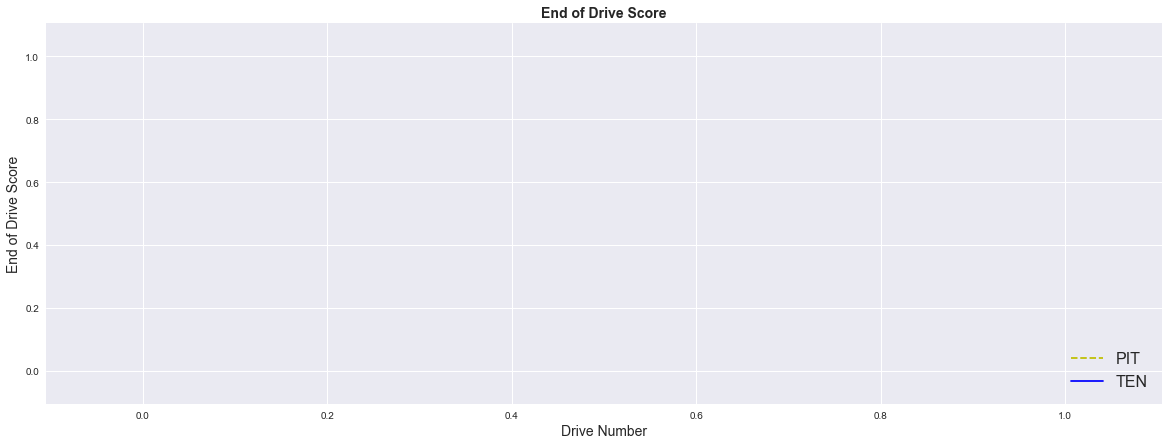

In [66]:
# Reset Fig
plt.close('all')
plt.style.use('seaborn')
fig, ax1 = plt.subplots(figsize=(20,7))
# plt.gca().invert_xaxis()

line1 = ax1.plot(ten_pit_game['drive'],ten_pit_game['total_home_score'],'y--',label='PIT')
line2 = ax1.plot(ten_pit_game['drive'],ten_pit_game['total_away_score'],'b-',label='TEN')

ax1.set_xlabel('Drive Number',fontsize=14)
ax1.set_ylabel('End of Drive Score',fontsize=14)
ax1.set_title("End of Drive Score",fontsize=14,fontweight='bold')

ax1.legend(loc=4,fontsize=16)

plt.show()